In [5]:
import pandas as pd
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

# โหลดข้อมูลจากไฟล์ HyperLeda โดยข้าม 91 บรรทัดแรก
df = pd.read_csv("HyperLeda_meandata_1745641349.txt", sep=r'\s+', engine='python', skiprows=91)

In [7]:
# โหลดข้อมูลจากไฟล์
data = df

In [8]:
print(data.shape)

(2868904, 82)


In [ ]:
# เอาเฉพาะแถวที่มีค่าความเร็ว v (จำเป็นต้องมีเพื่อคำนวณระยะทาง)
data = data.dropna(subset=['v', 'al2000', 'de2000'])  # ต้องมีพิกัดด้วย

In [10]:
import astropy.units as u

# แปลงคอลัมน์ v เป็นตัวเลข
data['v'] = pd.to_numeric(data['v'], errors='coerce')

# กรองเฉพาะแถวที่ v มีค่าจริง
data_valid = data[data['v'].notnull()]

# ใส่หน่วยให้ v
v = data_valid['v'].values * (u.km / u.s)

# กำหนดค่าคงที่ฮับเบิล
H0 = 70 * (u.km / u.s / u.Mpc)

# คำนวณระยะทาง
d_mpc = v / H0  # หน่วย Mpc


/var/folders/b8/w5gq0wdx1pbbwwjv87lm8c_c0000gn/T/ipykernel_32002/3233842794.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['v'] = pd.to_numeric(data['v'], errors='coerce')


In [ ]:
# กำหนดค่าคงที่ฮับเบิล
H0 = 70 * (u.km / u.s / u.Mpc)

# ความเร็ว (v) ใส่หน่วย km/s
v = data['v'].values * (u.km / u.s)

# คำนวณระยะทาง
d_mpc = v / H0             # ได้ระยะทางเป็น Mpc
d_lyr = d_mpc.to(u.lyr)    # แปลงเป็น Light year
d_glyr = d_lyr.value / 1e9 # แปลงเป็นพันล้านปีแสง (Glyr)

# เก็บลง DataFrame
data['dm'] = d_glyr

/var/folders/b8/w5gq0wdx1pbbwwjv87lm8c_c0000gn/T/ipykernel_32002/1436421507.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['dm'] = d_glyr


In [12]:
# บังคับให้ al2000 และ de2000 เป็น float
data['al2000'] = pd.to_numeric(data['al2000'], errors='coerce')
data['de2000'] = pd.to_numeric(data['de2000'], errors='coerce')

# แล้วลบ NaN ที่ค้างอยู่
data = data.dropna(subset=['al2000', 'de2000', 'dm'])


/var/folders/b8/w5gq0wdx1pbbwwjv87lm8c_c0000gn/T/ipykernel_32002/630570152.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['al2000'] = pd.to_numeric(data['al2000'], errors='coerce')
/var/folders/b8/w5gq0wdx1pbbwwjv87lm8c_c0000gn/T/ipykernel_32002/630570152.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['de2000'] = pd.to_numeric(data['de2000'], errors='coerce')


In [ ]:
# --- Cartesian Coordinates ---
data['x'] = data['dm'] * np.cos(np.radians(data['de2000'])) * np.cos(np.radians(data['al2000'] * 15))
data['y'] = data['dm'] * np.cos(np.radians(data['de2000'])) * np.sin(np.radians(data['al2000'] * 15))
data['z'] = data['dm'] * np.sin(np.radians(data['de2000']))

In [14]:
mask = data['x'].notna() & data['y'].notna() & data['z'].notna()
data_plot = data[mask]

In [15]:
print(f"✅ มีข้อมูลพร้อม plot {len(data_plot)} จุดแล้ว!")

✅ มีข้อมูลพร้อม plot 87256 จุดแล้ว!


In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

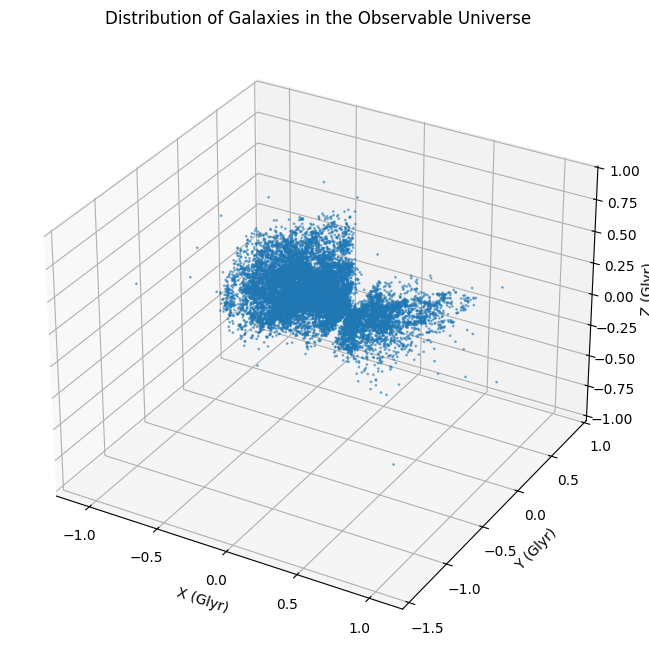

In [17]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data_plot['x'], data_plot['y'], data_plot['z'], s=1, alpha=0.5)

ax.set_xlabel('X (Glyr)')
ax.set_ylabel('Y (Glyr)')
ax.set_zlabel('Z (Glyr)')
ax.set_title('Distribution of Galaxies in the Observable Universe')

plt.show()

In [ ]:
import numpy as np

# ตรวจสอบว่าคอลัมน์ที่ใช้มีอยู่และเป็นตัวเลข
df['modbest'] = pd.to_numeric(df['modbest'], errors='coerce')
df['al2000'] = pd.to_numeric(df['al2000'], errors='coerce')
df['de2000'] = pd.to_numeric(df['de2000'], errors='coerce')

# กรองเฉพาะแถวที่มีข้อมูลครบ
df = df[df[['modbest', 'al2000', 'de2000']].notnull().all(axis=1)]

# แปลง modulus → ระยะทาง (Gly)
df['distance_gly'] = 10 ** ((df['modbest'] + 5) / 5) / 1e6 / 306.6

# แปลงพิกัด → XYZ
ra_rad = np.deg2rad(df['al2000'])
dec_rad = np.deg2rad(df['de2000'])
r = df['distance_gly']

df['x'] = r * np.cos(dec_rad) * np.cos(ra_rad)
df['y'] = r * np.cos(dec_rad) * np.sin(ra_rad)
df['z'] = r * np.sin(dec_rad)

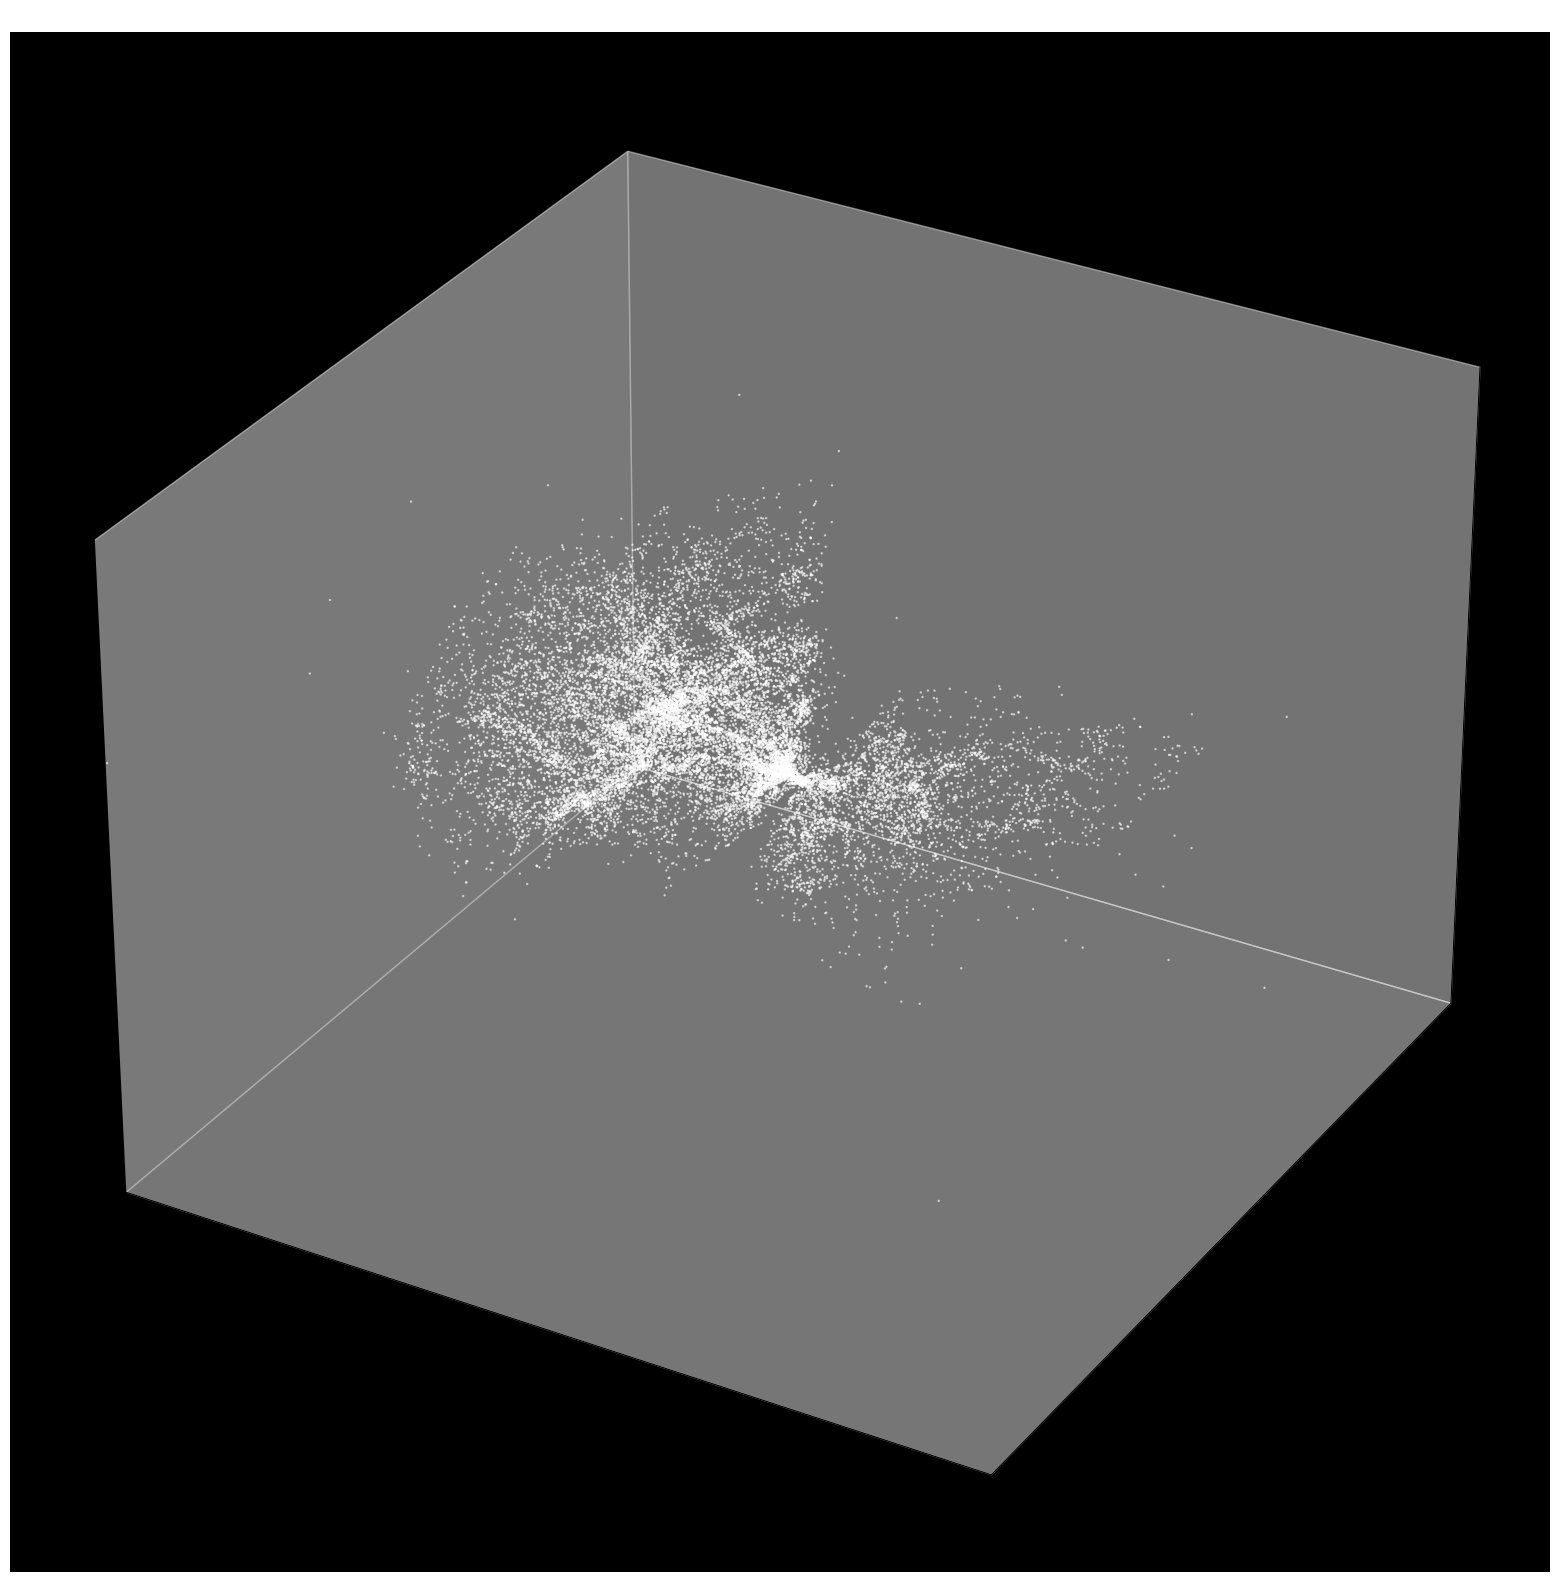

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np
import os

# --- เตรียมค่า frame ---
max_dms = [x for x in np.arange(28, 0, -1)] + [round(x, 1) for x in np.arange(0.9, 0, -0.1)]

# --- สร้างโฟลเดอร์ไว้เซฟไฟล์ถ้ายังไม่มี ---
os.makedirs('./plots', exist_ok=True)

# --- เตรียมฟิกเกอร์ ---
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')

def set_3d_plot_options(ax):
    """กำหนด Option ของกราฟ 3D"""
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1])
    ax.set_facecolor('black')
    ax.grid(alpha=0.3)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

def update(max_dm):
    """อัปเดตแต่ละ frame"""
    ax.cla()  # ล้างกราฟ
    set_3d_plot_options(ax)
    
    # กรองข้อมูล
    data_dm = data[data['dm'] <= max_dm]
    
    # วาด scatter
    ax.scatter(
        data_dm['x'], 
        data_dm['y'], 
        data_dm['z'], 
        s=0.5, 
        c='white', 
        alpha=0.6
    )
    
    # ตั้งชื่อกราฟ
    ax.set_title(f'Observable Universe up to {max_dm:.1f} billion lightyears', color='white')
    
    return []

# --- สร้าง Animation ---
ani = animation.FuncAnimation(
    fig,
    update,
    frames=max_dms,
    interval=200,  # เปลี่ยนเฟรมทุก 200 ms
    blit=True,
)

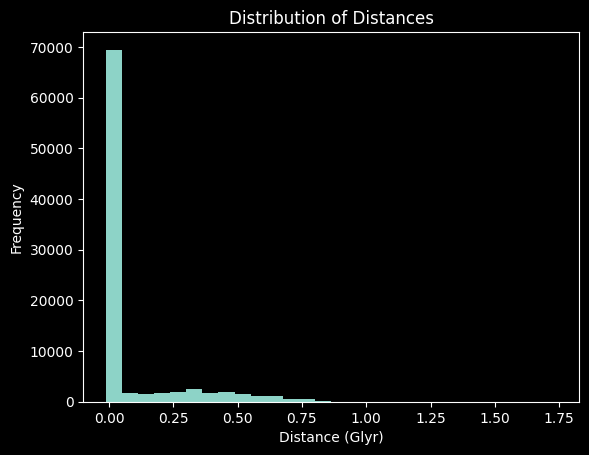

In [ ]:
# First, load the matplotlib library
import matplotlib.pyplot as plt

# Set the dark background style
plt.style.use('dark_background')

# Plot histogram (no .value needed)
plt.hist(data['dm'], bins=28)

# Label the axes
plt.xlabel('Distance (Glyr)')
plt.ylabel('Frequency')
plt.title('Distribution of Distances')

# Show the plot
plt.show()

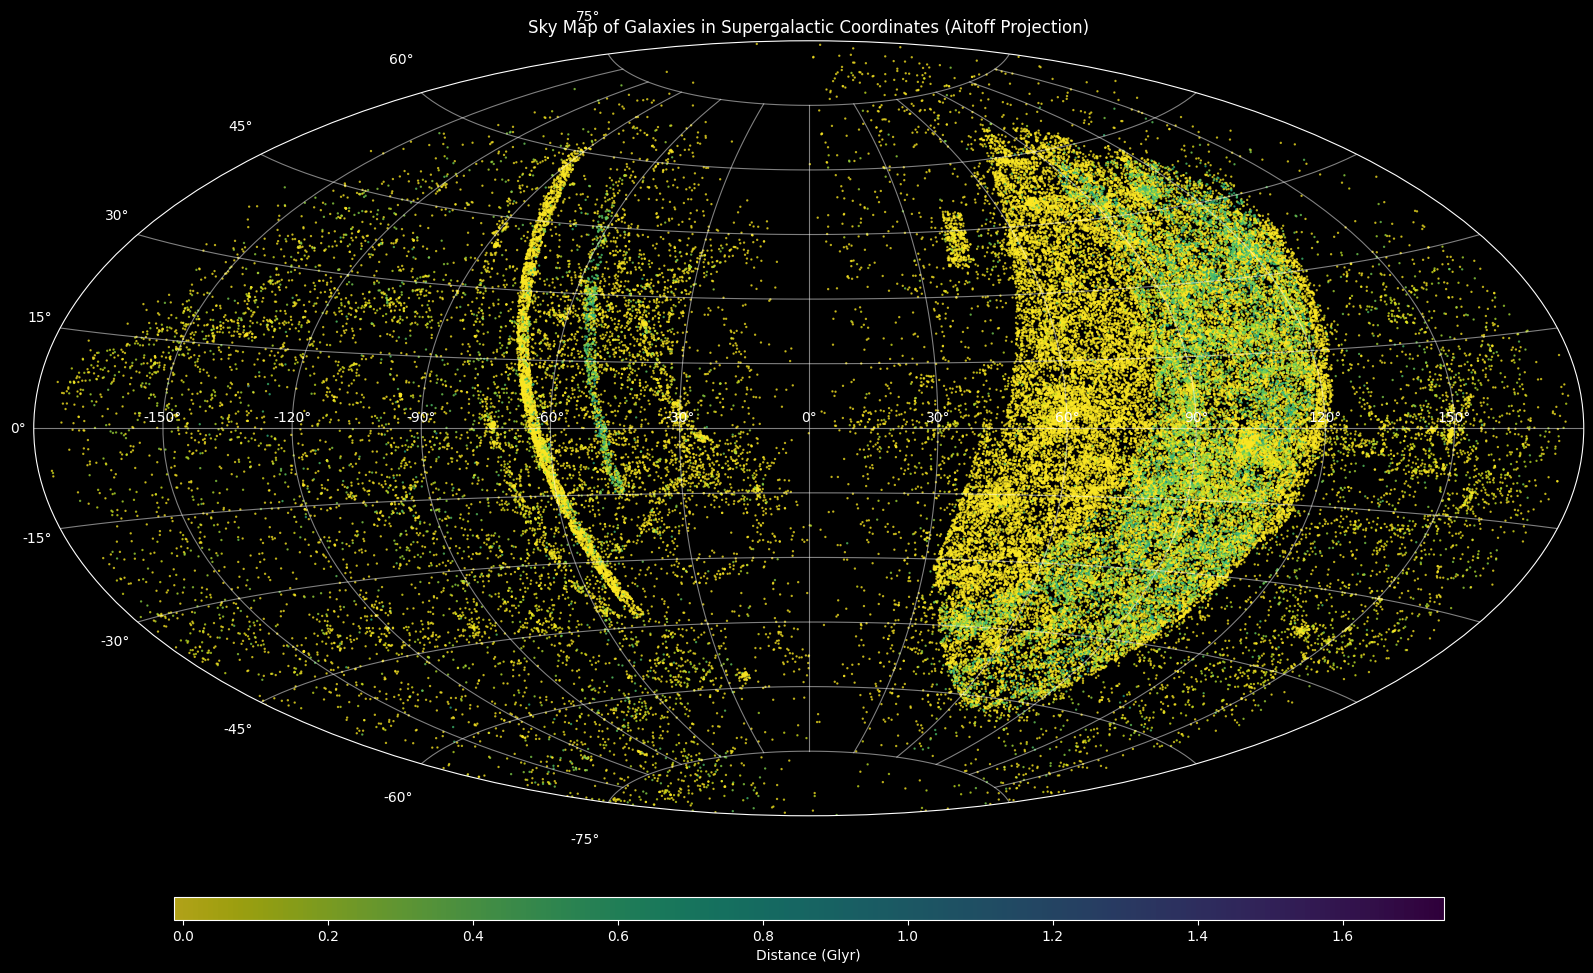

In [ ]:
from astropy.coordinates import SkyCoord
import astropy.units as u
import matplotlib.pyplot as plt

# Create SkyCoord object
gal = SkyCoord(
    data['sgl'].values, 
    data['sgb'].values, 
    frame='supergalactic', 
    unit=u.deg,
)

# Create figure
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(
    111, 
    projection='aitoff', 
    label='galaxies',
)
ax.grid(alpha=0.5)

# Plot scatter
img = ax.scatter(
    gal.sgl.wrap_at(180 * u.deg).radian,  # ❗ ใช้ gal.sgl
    gal.sgb.radian,                      # ❗ ใช้ gal.sgb
    s=0.5, 
    c=data['dm'], 
    cmap=plt.cm.viridis_r, 
    alpha=0.7,
    linestyle='None',
)

# Add colorbar
fig.colorbar(
    img, 
    orientation='horizontal', 
    aspect=55, 
    label='Distance (Glyr)',
    pad=0.07, 
    fraction=0.020,
)

# Show
plt.title('Sky Map of Galaxies in Supergalactic Coordinates (Aitoff Projection)')
plt.show()